# 1.- Importar las librerías de Python necesarias

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn import metrics

# 2.- Input Data y construcción del Dataframe

## Carga de los ficheros de manera individual

In [2]:
PATH_NAME = '../Data/'
FILE_NAME1 = 'train_1.csv'
FILE_NAME2 = 'train_2.csv'
FILE_NAME3 = 'predict_1.csv'
FILE_NAME4 = 'predict_2.csv'

In [3]:
train1 = pd.read_csv(PATH_NAME+FILE_NAME1, sep=",")
train2 = pd.read_csv(PATH_NAME+FILE_NAME2, sep=",")
predict1 = pd.read_csv(PATH_NAME+FILE_NAME3, sep=",")
predict2 = pd.read_csv(PATH_NAME+FILE_NAME4, sep=",")

## Analizar datos de los ficheros

<b> DataFrame "train1"

In [44]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv
0      1  18.0     0  6.575  4.0900    1  296  24.0
1      2   0.0     0  6.421  4.9671    2  242  21.6
2      4   0.0     0  6.998  6.0622    3  222  33.4
3      5   0.0     0  7.147  6.0622    3  222  36.2
4      7  12.5     0  6.012  5.5605    5  311  22.9
..   ...   ...   ...    ...     ...  ...  ...   ...
328  500   0.0     0  5.569  2.3999    6  391  17.5
329  502   0.0     0  6.593  2.4786    1  273  22.4
330  503   0.0     0  6.120  2.2875    1  273  20.6
331  504   0.0     0  6.976  2.1675    1  273  23.9
332  506   0.0     0  6.030  2.5050    1  273  11.9

[333 rows x 8 columns] 

Tipo de dato

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
medv    float64
dtype: object 

Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
medv    0
dtype: int64 

Indices estadisticos

                ID          zn        chas         

<b> DataFrame "train2"

In [45]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train2.duplicated().any())

Vista del DF

       ID     crim  indus    nox   age  ptratio   black  lstat
0      1  0.00632   2.31  0.538  65.2     15.3  396.90   4.98
1      2  0.02731   7.07  0.469  78.9     17.8  396.90   9.14
2      4  0.03237   2.18  0.458  45.8     18.7  394.63   2.94
3      5  0.06905   2.18  0.458  54.2     18.7  396.90   5.33
4      7  0.08829   7.87  0.524  66.6     15.2  395.60  12.43
..   ...      ...    ...    ...   ...      ...     ...    ...
328  500  0.17783   9.69  0.585  73.5     19.2  395.77  15.10
329  502  0.06263  11.93  0.573  69.1     21.0  391.99   9.67
330  503  0.04527  11.93  0.573  76.7     21.0  396.90   9.08
331  504  0.06076  11.93  0.573  91.0     21.0  396.90   5.64
332  506  0.04741  11.93  0.573  80.8     21.0  396.90   7.88

[333 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

 ID       

<b> DataFrame "predict1"

In [46]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax
0      3   0.0     0  7.185  4.9671    2  242
1      6   0.0     0  6.430  6.0622    3  222
2      8  12.5     0  6.172  5.9505    5  311
3      9  12.5     0  5.631  6.0821    5  311
4     10  12.5     0  6.004  6.5921    5  311
..   ...   ...   ...    ...     ...  ...  ...
168  496   0.0     0  5.670  2.7986    6  391
169  497   0.0     0  5.390  2.7986    6  391
170  499   0.0     0  6.019  2.4091    6  391
171  501   0.0     0  6.027  2.4982    6  391
172  505   0.0     0  6.794  2.3889    1  273

[173 rows x 7 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
dtype: int64 

Indices estadisticos

                ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.00000

<b> DataFrame "predict2"

In [47]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict2.duplicated().any())

Vista del DF

       ID     crim  indus    nox    age  ptratio   black  lstat
0      3  0.02729   7.07  0.469   61.1     17.8  392.83   4.03
1      6  0.02985   2.18  0.458   58.7     18.7  394.12   5.21
2      8  0.14455   7.87  0.524   96.1     15.2  396.90  19.15
3      9  0.21124   7.87  0.524  100.0     15.2  386.63  29.93
4     10  0.17004   7.87  0.524   85.9     15.2  386.71  17.10
..   ...      ...    ...    ...    ...      ...     ...    ...
168  496  0.17899   9.69  0.585   28.8     19.2  393.29  17.60
169  497  0.28960   9.69  0.585   72.9     19.2  396.90  21.14
170  499  0.23912   9.69  0.585   65.3     19.2  396.90  12.92
171  501  0.22438   9.69  0.585   79.7     19.2  396.90  14.33
172  505  0.10959  11.93  0.573   89.3     21.0  393.45   6.48

[173 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

## Unificar DataFrames "Train" y "Duplicate"

<b> train

In [51]:
train = pd.merge(train1,train2,how='inner', on='ID', validate='1:1')
train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [52]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv     crim  indus    nox  \
0      1  18.0     0  6.575  4.0900    1  296  24.0  0.00632   2.31  0.538   
1      2   0.0     0  6.421  4.9671    2  242  21.6  0.02731   7.07  0.469   
2      4   0.0     0  6.998  6.0622    3  222  33.4  0.03237   2.18  0.458   
3      5   0.0     0  7.147  6.0622    3  222  36.2  0.06905   2.18  0.458   
4      7  12.5     0  6.012  5.5605    5  311  22.9  0.08829   7.87  0.524   
..   ...   ...   ...    ...     ...  ...  ...   ...      ...    ...    ...   
328  500   0.0     0  5.569  2.3999    6  391  17.5  0.17783   9.69  0.585   
329  502   0.0     0  6.593  2.4786    1  273  22.4  0.06263  11.93  0.573   
330  503   0.0     0  6.120  2.2875    1  273  20.6  0.04527  11.93  0.573   
331  504   0.0     0  6.976  2.1675    1  273  23.9  0.06076  11.93  0.573   
332  506   0.0     0  6.030  2.5050    1  273  11.9  0.04741  11.93  0.573   

      age  ptratio   black  lstat  
0    65.2   

# 3.- Matriz de correlación, analisis de distribución y Boxplot's

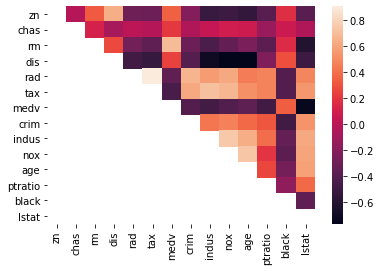

In [63]:
analisis_df=train.drop(columns='ID')
correlation_matrix = analisis_df.corr().where(~np.tril(np.ones(analisis_df.corr().shape)).astype(np.bool))
correlation_matrix
sns.heatmap(correlation_matrix)
plt.show()

In [62]:
correlation_table = correlation_matrix.stack().to_frame().reset_index()
correlation_table['corr_columns'] = correlation_table['level_0'] + ' - ' + correlation_table['level_1']
correlation_table = correlation_table.drop(columns=['level_0', 'level_1'])
correlation_table['values'] = correlation_table[0]
correlation_table = correlation_table[['corr_columns', 'values']]
deltacorr = 0.6
filter_1 = correlation_table['values'] > deltacorr
filter_2 = correlation_table['values'] < -deltacorr

correlation_table.where(filter_1 | filter_2).groupby('corr_columns').sum()

,values
corr_columns,
dis - age,-0.764208
dis - indus,-0.702327
dis - nox,-0.769364
indus - age,0.638378
indus - lstat,0.614155
indus - nox,0.750087
medv - lstat,-0.738600
nox - age,0.736000
rad - crim,0.666636


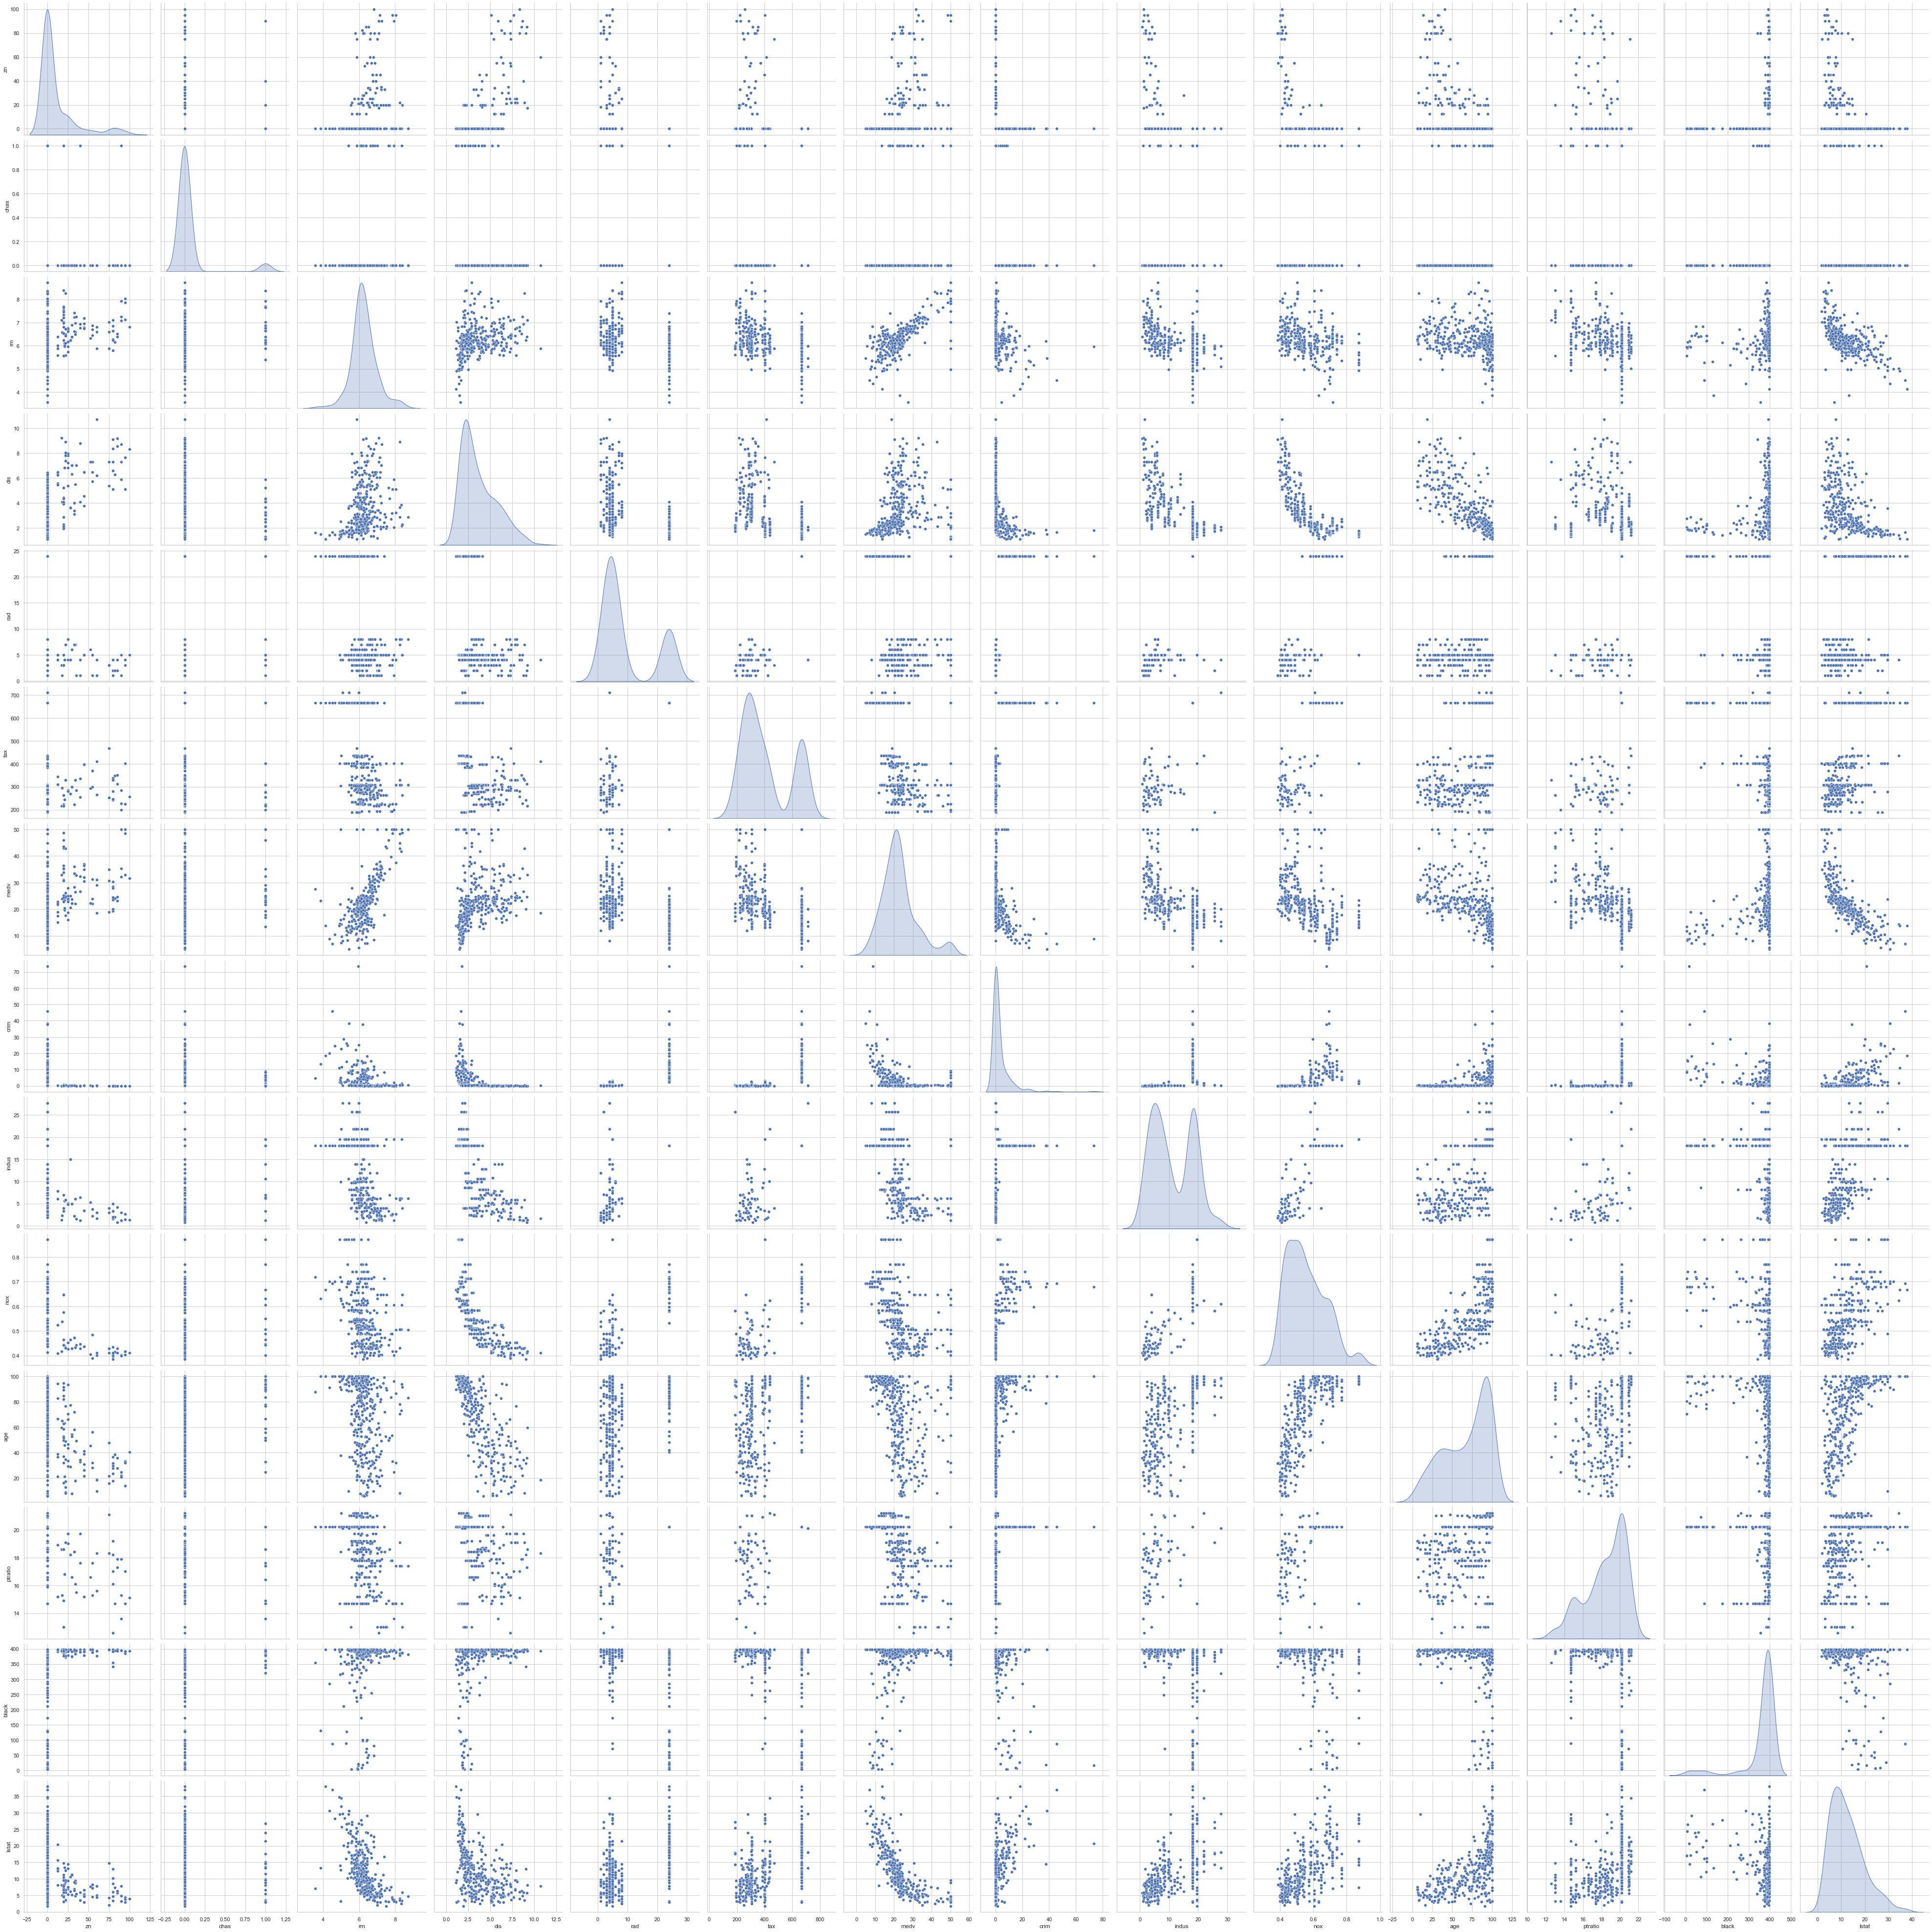

In [64]:
sns.set(style='whitegrid', color_codes=True)
quantitative_plots = sns.pairplot(analisis_df, height=4, diag_kind='kde')

/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

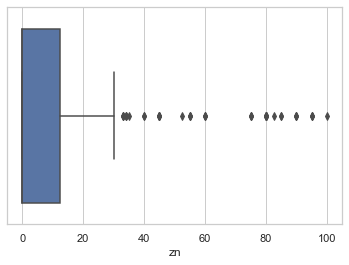

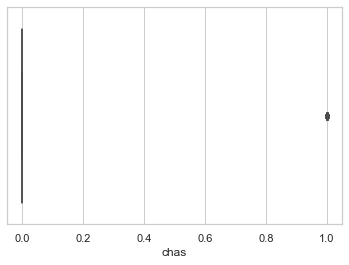

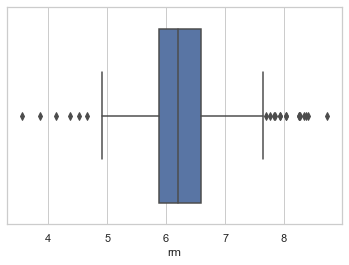

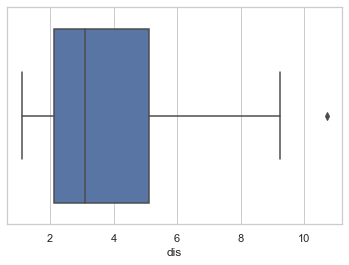

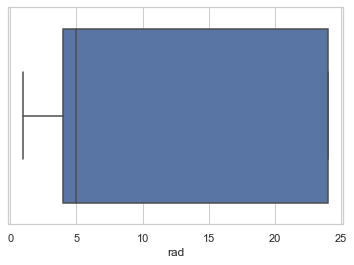

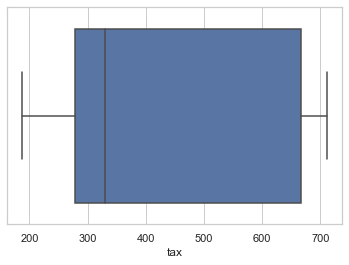

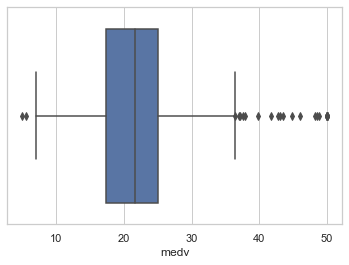

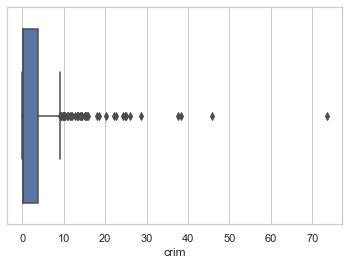

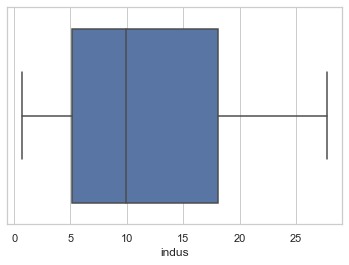

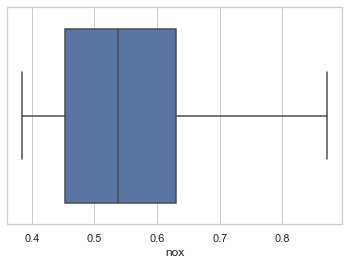

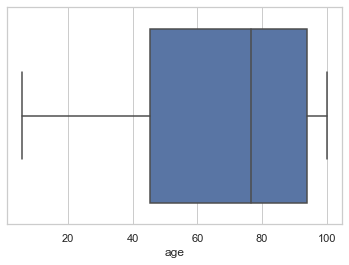

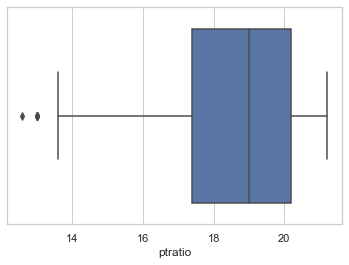

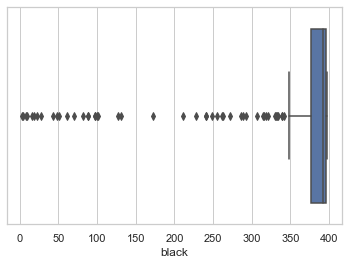

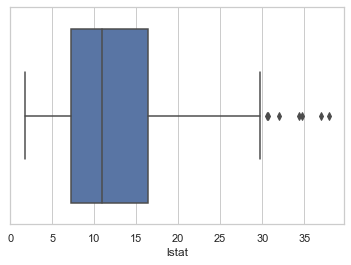

In [66]:
for col in analisis_df.columns:
  f, ax_new = plt.subplots(1)
  sns.boxplot(analisis_df[col], ax=ax_new)

# 4.- Limpieza de datos

## Outliers

In [75]:
# Definimos un DataFrame como resultado de la limpieza de datos y sin la columna "ID"
train_cleaning=train.drop(columns='ID') 
# Ahora empezamos a eliminar outliers
# Segun el analisis con los Boxplot's, existe una gran cantidad de outliers en las variables "zn"(hacia el max),
# "crim" (hacia el max) y "black" (hacia el min).

meanzn = train_cleaning['zn'].describe()['mean']
stdzn = train_cleaning['zn'].describe()['std']
meancrim = train_cleaning['crim'].describe()['mean']
stdcrim = train_cleaning['crim'].describe()['std']
meanblack = train_cleaning['black'].describe()['mean']
stdblack = train_cleaning['black'].describe()['std']

n = 3 # aca se define la cantidad de sigmas a evaluar

train_cleaning = train_cleaning[train_cleaning['zn']< (meanzn+n*stdzn)] # Se eliminan outliers de 'zn'
train_cleaning = train_cleaning[train_cleaning['crim']< (meancrim+n*stdcrim)] # Se eliminan outliers de 'zn'
train_cleaning = train_cleaning[train_cleaning['black']> (meanblack-n*stdblack)] # Se eliminan outliers de 'zn'
train_cleaning

,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


## Eliminar correlaciones

In [ ]:
# aun no las defino!!!

# 5.- Entrenar al modelo supervisado de regresion

## a) Modelo de regresión lineal

In [76]:
target = train_cleaning['medv']
train_cleaning.pop('medv')

features = StandardScaler().fit_transform(train_cleaning)
features

X_train = features
y_train = target
lr = LinearRegression()
modelo = lr.fit(X_train, y_train)

In [77]:
lr.score(X_train, y_train)

0.6970046216900176